In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, Input, BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam

import numpy
import math
import cv2

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
MODEL_PATH = "./model/srcnn.h5"
IMG_NAME = "./image/img (10).bmp"
OPENCV_NAME = "opencv.bmp"
SRCNN_NAME = "srcnn.bmp"

INTERPOLATION = cv2.INTER_LINEAR
sizeMux = 4

In [14]:
def predict_model():
    # lrelu = LeakyReLU(alpha=0.1)
    SRCNN = Sequential()
    SRCNN.add(Conv2D(nb_filter=128, nb_row=9, nb_col=9, init='glorot_uniform',
                     activation='relu', border_mode='valid', bias=True, input_shape=(None, None, 1)))
    SRCNN.add(Conv2D(nb_filter=64, nb_row=3, nb_col=3, init='glorot_uniform',
                     activation='relu', border_mode='same', bias=True))
    # SRCNN.add(BatchNormalization())
    SRCNN.add(Conv2D(nb_filter=1, nb_row=5, nb_col=5, init='glorot_uniform',
                     activation='linear', border_mode='valid', bias=True))
    adam = Adam(lr=0.0003)
    SRCNN.compile(optimizer=adam, loss='mean_squared_error', metrics=['mean_squared_error'])
    return SRCNN

In [15]:
srcnn_model = predict_model()
srcnn_model.load_weights(MODEL_PATH)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", input_shape=(None, Non..., kernel_size=(9, 9), filters=128, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="relu", kernel_size=(3, 3), filters=64, padding="same", kernel_initializer="glorot_uniform", use_bias=True)`
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(activation="linear", kernel_size=(5, 5), filters=1, padding="valid", kernel_initializer="glorot_uniform", use_bias=True)`
  # Remove the CWD from sys.path while we load stuff.


In [16]:
img = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
shape = img.shape

Y_img = cv2.resize(img[:, :, 0], (int(shape[1] * sizeMux), int(shape[0] * sizeMux)), INTERPOLATION)
img = cv2.resize(img, (int(shape[1] * sizeMux), int(shape[0] * sizeMux)), INTERPOLATION)

#Y_img = cv2.resize(img[:, :, 0], (int(shape[1] / sizeMux), int(shape[0] / sizeMux)), cv2.INTER_CUBIC)
#Y_img = cv2.resize(Y_img, (shape[1], shape[0]), cv2.INTER_CUBIC)
#img[:, :, 0] = Y_img

img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(OPENCV_NAME, img)

True

In [17]:
Y = numpy.zeros((1, img.shape[0], img.shape[1], 1), dtype=float)
Y[0, :, :, 0] = Y_img.astype(float) / 255.

pre = srcnn_model.predict(Y, batch_size=1) * 255.
pre[pre[:] > 255] = 255
pre[pre[:] < 0] = 0

pre = pre.astype(numpy.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img[6: -6, 6: -6, 0] = pre[0, :, :, 0]
img = cv2.cvtColor(img, cv2.COLOR_YCrCb2BGR)
cv2.imwrite(SRCNN_NAME, img)

True

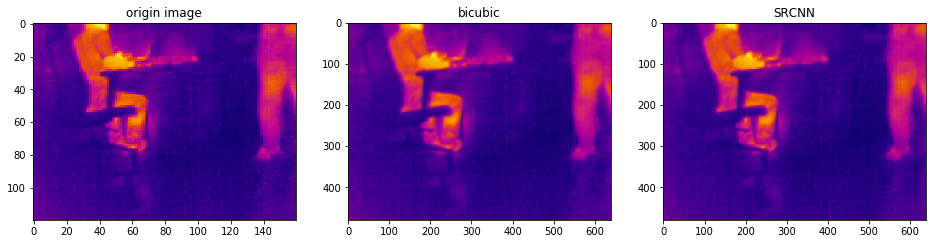

In [18]:
# display image
im1 = cv2.imread(IMG_NAME, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
im2 = cv2.imread(OPENCV_NAME, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
im3 = cv2.imread(SRCNN_NAME, cv2.IMREAD_COLOR)
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2RGB)

plt.figure(num='srcnn',figsize=(16,16))

plt.subplot(1,3,1)
plt.title('origin image')
plt.imshow(im1)

plt.subplot(1,3,2)
plt.title('OpenCV')
plt.imshow(im2)

plt.subplot(1,3,3)
plt.title('SRCNN')
plt.imshow(im3)